In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('melb_data.csv')
pd.set_option('display.max_columns', None) 
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [4]:
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [5]:
df['Regionname'] = df['Regionname'].str.replace(r'\b(Northern|Southern|Eastern|Western|South-Eastern)\b\s?', '', regex=True)
df['Regionname'].value_counts()


Regionname
Metropolitan    13454
Victoria          126
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Regionname'] = le.fit_transform(df['Regionname'])

In [7]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
df = df.dropna(subset=['Car'])

In [9]:
#Regresión lineal

cols = ['Rooms','Bathroom','Bedroom2','Car','Regionname','Landsize','Lattitude','Longtitude']
X = df[cols]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R^2: {r2_score(y_test, y_pred):.2f}')

MSE: 270711139858.96
R^2: 0.34


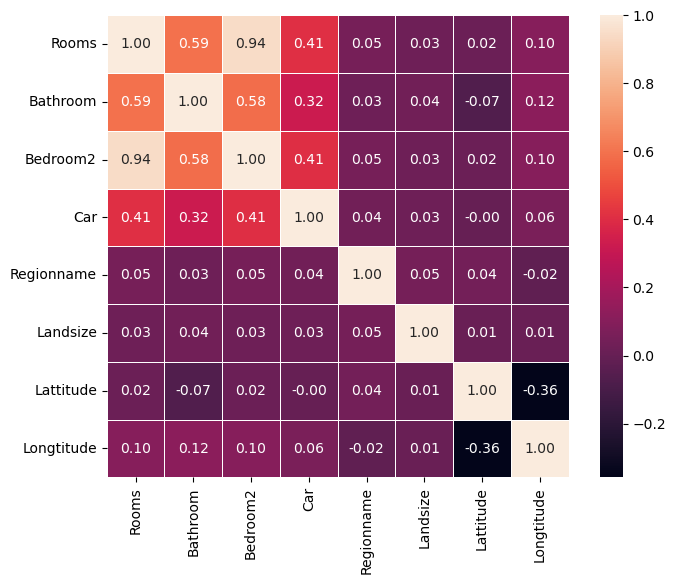

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, linewidth=.5)
plt.show()

In [11]:
#Decision Tree + búsqueda de hiperparametros con GridSearch

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

cols = ['Rooms','Bathroom','Landsize','Lattitude','Longtitude']
X = df[cols]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth' : [5,10,15,20,None],
    'min_samples_split':[2,10,20,50,100],
    'min_samples_leaf':[1,5,10,20,30]
}

dtr = DecisionTreeRegressor(random_state=1)

grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor R²:", grid_search.best_score_)

Mejores hiperparámetros: {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 50}
Mejor R²: 0.6804629654980522


In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Distribuciones para la búsqueda aleatoria
param_dist = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': randint(2, 100),
    'min_samples_leaf': randint(1, 50)
}

# Configurar RandomizedSearch
random_search = RandomizedSearchCV(estimator=dtr, param_distributions=param_dist, n_iter=20, cv=5, scoring='r2', random_state=1, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor R²:", random_search.best_score_)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 12, 'min_samples_split': 30}
Mejor R²: 0.6814910235247578


Elijo los hiperparámetros obtenidos a partir de 'GridSearchCV' ya que este encontró un límite de profundidad para el árbol, mientras que con 'RandomizedSearchCV' el árbol crece sin límite.

In [13]:
dtr = DecisionTreeRegressor(max_depth=15, min_samples_leaf= 10, min_samples_split=50, random_state=1)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}, R^2: {r2:.2f}')

MSE: 126625817373.32, R^2: 0.69


In [14]:
#Validacion cruzada

from sklearn.model_selection import cross_val_score

dtr_best = DecisionTreeRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=50, random_state=1)

cv_scores = cross_val_score(dtr_best, X_train, y_train, cv=5, scoring='r2')

print("R² por fold:", cv_scores)
print("R² promedio:", np.mean(cv_scores))
print("Desviación estándar del R²:", np.std(cv_scores))

R² por fold: [0.64833358 0.68180245 0.6711246  0.70705474 0.69003746]
R² promedio: 0.6796705661352063
Desviación estándar del R²: 0.01958035093199413


Se realizó una validación cruzada con 5 folds para evaluar la estabilidad del modelo DecisionTreeRegressor ajustado con los mejores hiperparámetros obtenidos a través de Grid Search. La validación cruzada permite medir el desempeño del modelo de forma más robusta al entrenarlo y evaluarlo en diferentes particiones del conjunto de datos, evitando depender de una única división entre train y test.
La estabilidad del modelo queda reflejada en la baja desviación estándar, indicando que el rendimiento no varía significativamente entre las distintas particiones. Además, el R² promedio (0.6876) es consistente con el R² obtenido sobre el conjunto de test (0.72), lo que sugiere que el modelo tiene un buen equilibrio entre sesgo y varianza, sin señales evidentes de sobreajuste o subajuste.

In [15]:
#Búsqueda de outliers para las siguientes columnas

cols_out = ['Price','Landsize','Rooms','Bedroom2']

for col in cols_out:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    median = df[col].median()
    mean = df[col].mean()

    IQR = Q3-Q1

    llimit = Q1-1.5*Q3
    ulimit = Q3 +1.5*Q1

    df[f'Outlier_{col}'] = (df[col] < llimit) | (df[col] > ulimit)    
    
    print(f"Outliers columna '{col}' {df[f'Outlier_{col}'].value_counts()}")

Outliers columna 'Price' Outlier_Price
False    12863
True       655
Name: count, dtype: int64
Outliers columna 'Landsize' Outlier_Landsize
False    12683
True       835
Name: count, dtype: int64
Outliers columna 'Rooms' Outlier_Rooms
False    13499
True        19
Name: count, dtype: int64
Outliers columna 'Bedroom2' Outlier_Bedroom2
False    13498
True        20
Name: count, dtype: int64


C:\Users\Lucas\AppData\Local\Temp\ipykernel_9604\272221371.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Outlier_{col}'] = (df[col] < llimit) | (df[col] > ulimit)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_9604\272221371.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Outlier_{col}'] = (df[col] < llimit) | (df[col] > ulimit)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_9604\272221371.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [16]:
df_no_outliers = df[~df['Outlier_Price']]
df_no_outliers = df_no_outliers[~df_no_outliers['Outlier_Landsize']]
df_no_outliers = df_no_outliers[~df_no_outliers['Outlier_Rooms']]
df_no_outliers = df_no_outliers[~df_no_outliers['Outlier_Bedroom2']]
df_no_outliers

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Outlier_Price,Outlier_Landsize,Outlier_Rooms,Outlier_Bedroom2
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,0,4019.0,False,False,False,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,0,4019.0,False,False,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,0,4019.0,False,False,False,False
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,0,4019.0,False,False,False,False
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,0,4019.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,Westmeadows,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.5,3049.0,3.0,2.0,2.0,256.0,NaN,NaN,NaN,-37.67917,144.89390,0,2474.0,False,False,False,False
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,0,7392.0,False,False,False,False
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,0,6380.0,False,False,False,False
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,0,6380.0,False,False,False,False


In [17]:
#Decision Tree + búsqueda de hiperparametros con GridSearch

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

cols = ['Rooms','Bathroom','Landsize','Lattitude','Longtitude']
X = df_no_outliers[cols]
y = df_no_outliers['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth' : [5,10,15,20,None],
    'min_samples_split':[2,10,20,50,100],
    'min_samples_leaf':[1,5,10,20,30]
}

dtr = DecisionTreeRegressor(random_state=1)

grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor R²:", grid_search.best_score_)

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}
Mejor R²: 0.7136317945128599


In [18]:
dtr = DecisionTreeRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=2, random_state=1)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}, R^2: {r2:.2f}')

MSE: 50488721617.15, R^2: 0.74


In [19]:
#Validacion cruzada

from sklearn.model_selection import cross_val_score

dtr_best = DecisionTreeRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=2, random_state=1)

mse_scores = -cross_val_score(dtr_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
r2_scores = cross_val_score(dtr_best, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)


print("MSE por fold:", mse_scores)
print("MSE promedio:", np.mean(mse_scores))
print("Desviación estándar de MSE:", np.std(mse_scores))

print("R² por fold:", r2_scores)
print("R² promedio:", np.mean(r2_scores))
print("Desviación estándar de R²:", np.std(r2_scores))

MSE por fold: [5.75384221e+10 5.87244778e+10 5.90700197e+10 5.24693911e+10
 5.51845705e+10]
MSE promedio: 56597376256.07533
Desviación estándar de MSE: 2472261112.148745
R² por fold: [0.6943097  0.72040043 0.69996027 0.72535772 0.72813087]
R² promedio: 0.7136317945128599
Desviación estándar de R²: 0.013811508780506852


A pesar de tener menos datos, se logró disminuir el MSE

Modelo más avanzado
RandomForest

In [20]:
from sklearn.ensemble import RandomForestRegressor

X = df_no_outliers[['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']]
y = df_no_outliers['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#Busqueda de hiperparametros con GridSearch

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators':[50,100,200,300],
    'max_depth':[10,20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None],
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor MSE (negativo):", -grid_search.best_score_)

# Evaluar con los mejores hiperparámetros
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Mejor MSE (negativo): 42706769958.899376
MSE: 38678138801.97
R²: 0.80


Mejores hiperparámetros: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Mejor MSE (negativo): 42706769958.899376
MSE: 38678138801.97
R²: 0.80

In [23]:
best_rf = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300, max_features=None)

mse_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')

print("MSE por fold:", mse_scores)
print("MSE promedio:", np.mean(mse_scores))
print("Desviación estándar de MSE:", np.std(mse_scores))

print("R² por fold:", r2_scores)
print("R² promedio:", np.mean(r2_scores))
print("Desviación estándar de R²:", np.std(r2_scores))

MSE por fold: [-4.28017302e+10 -4.37980707e+10 -4.64726650e+10 -4.04371940e+10
 -4.08745276e+10]
MSE promedio: -42876837514.90782
Desviación estándar de MSE: 2179238061.259169
R² por fold: [0.77334904 0.7913327  0.7648347  0.78839353 0.7977941 ]
R² promedio: 0.7831408151982795
Desviación estándar de R²: 0.012168890408893728


In [24]:
#Busqueda de hiperparametros con RandomizedSearch

from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features' : [None]
}

rd = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42, verbose=1)
random_search.fit(X_train, y_train)

print('Mejores hiperparametros.', random_search.best_params_)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)


print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores hiperparametros. {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 329}
MSE: 38708441093.30052
R²: 0.8036927594634253


In [25]:
best_rf = RandomForestRegressor(max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=329)

mse_scores = -cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
r2_scores= cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')

print(f"Scores por fold (MSE negativo): {mse_scores}")
print(f"MSE promedio: {-mse_scores.mean()}")
print(f"Desviación estándar de MSE: {mse_scores.std()}")

print("R² por fold:", r2_scores)
print("R² promedio:", np.mean(r2_scores))
print("Desviación estándar del R²:", np.std(r2_scores))

Scores por fold (MSE negativo): [4.27327144e+10 4.40357350e+10 4.64821609e+10 4.01323485e+10
 4.10542218e+10]
MSE promedio: -42887436150.724525
Desviación estándar de MSE: 2245696244.2396646
R² por fold: [0.77313982 0.79137918 0.76420468 0.78871322 0.79832262]
R² promedio: 0.7831519045239616
Desviación estándar del R²: 0.012553929240963789


El MSE para los hiperparametros obtenidos con 'GridSearchCV' es menor que el obtenido para los hiperparametros con 'RandomizedSearchCV'